# **ORIE 4741 / 5741 Term Project**
## *- Caffinated Treasury Bot*

### Authors:
Cecilia Yang - xy96@cornell.edu <br>
Kayla Yang - <br>
Simon (Jiahe) Tian - jt886@cornell.edu <br>

## Project Objective

The purpose of this project is to empower user without sufficient financial knowledge to understand or improve their credit scores.

By providing the users with comprehensive insights and recommendations on how to improve their credit score, the users will be able to make informed decisions that will benifit their financial status in both short-term and long-term.

## Executive Summary

## Project Outline

## Dataset Research and Initial Analysis

### Dataset #1: Credit Score Classification

URL: https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data<br>
Number of Columns: 27<br>
Number of Rows: 50000<br>
Missing Headings? NO<br>
Mising Values? YES<br>
Pseudodata? MAYBE<br>

**Commment:** <br>
Included in the analysis as the dataset is large and contains many features.


### Dataset #2: Credit Card Approval Prediction

URL: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/data<br>
Number of Columns: 18<br>
Number of Rows: 50000<br>
Missing Headings? NO<br>
Mising Values? YES<br>
Pseudodata? MAYBE<br>

**Commment:** <br>
Included in the analysis as the dataset is large and contains many features.

## Importing Packages

In [1]:
# Import data manipulation libraries
#import necessary packages
import re
import pandas as pd
import numpy as np
from scipy import stats

import plotly.express as px
px.defaults.width, px.defaults.height = 1000, 600

# Set precision
pd.set_option('display.precision', 4)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This sets the aesthetics for seaborn plots
sns.set()

from scipy.stats import percentileofscore

## Credit Score Prediction Dataset (Dataset #1)

### Data Cleaning

In [2]:
#Import CSV Files for Dataset #1
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

/var/folders/qm/8yk6bc6s0zl9xyxlmz1kx1800000gn/T/ipykernel_12361/3408302141.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv('train.csv')


In [3]:
#remove duplicated rows
df_train_unique = df_train.drop_duplicates(keep='first')
df_test_unique = df_test.drop_duplicates(keep='first')

#### clean the training data

In [4]:
#convert below columns to numerical columns
df_train_unique['Age'] = pd.to_numeric(df_train_unique['Age'], errors='coerce')
df_train_unique['Annual_Income'] = pd.to_numeric(df_train_unique['Annual_Income'], errors='coerce')
df_train_unique['Outstanding_Debt'] = pd.to_numeric(df_train_unique['Outstanding_Debt'], errors='coerce')
df_train_unique['Amount_invested_monthly'] = pd.to_numeric(df_train_unique['Amount_invested_monthly'], errors='coerce')
df_train_unique['Monthly_Balance'] = pd.to_numeric(df_train_unique['Monthly_Balance'], errors='coerce')
df_train_unique['Changed_Credit_Limit'] = pd.to_numeric(df_train_unique['Changed_Credit_Limit'], errors='coerce')
df_train_unique['Monthly_Balance'] = pd.to_numeric(df_train_unique['Monthly_Balance'], errors='coerce')
df_train_unique['Num_of_Loan'] = pd.to_numeric(df_train_unique['Num_of_Loan'], errors='coerce')
df_train_unique['Num_of_Delayed_Payment'] = pd.to_numeric(df_train_unique['Num_of_Delayed_Payment'], errors='coerce')


In [5]:
df_train_unique.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,95061.0000,9.3020e+04,84998.0000,100000.0000,100000.0000,100000.0000,95215.0000,100000.0000,90254.0000,97909.0000,98035.0000,98991.0000,100000.0000,100000.0000,91216.0000,98791.0000
mean,110.9345,1.7858e+05,4194.1708,17.0913,22.4744,72.4660,2.7803,21.0688,31.0331,10.3890,27.7543,1426.5037,32.2852,1403.1182,195.5395,402.5513
std,689.4079,1.4429e+06,3183.6862,117.4048,129.0574,466.4226,62.5009,14.8601,226.9558,6.7895,193.1773,1155.0458,5.1169,8306.0413,199.5645,213.9255
min,-500.0000,7.0059e+03,303.6454,-1.0000,0.0000,1.0000,-100.0000,-5.0000,-3.0000,-6.4900,0.0000,0.2300,20.0000,0.0000,0.0000,0.0078
25%,24.0000,1.9436e+04,1625.5682,3.0000,4.0000,8.0000,1.0000,10.0000,9.0000,5.3200,3.0000,566.0800,28.0526,30.3067,72.2367,270.1066
50%,33.0000,3.7551e+04,3093.7450,6.0000,5.0000,13.0000,3.0000,18.0000,14.0000,9.4000,6.0000,1166.3700,32.3058,69.2495,128.9545,336.7312
75%,42.0000,7.2843e+04,5957.4483,7.0000,7.0000,20.0000,5.0000,28.0000,18.0000,14.8700,9.0000,1948.2000,36.4967,161.2242,236.8158,470.2629
max,8698.0000,2.4198e+07,15204.6333,1798.0000,1499.0000,5797.0000,1496.0000,67.0000,4397.0000,36.9700,2597.0000,4998.0700,50.0000,82331.0000,1977.3261,1602.0405


Now we want to understand the dataset better and remove any outliers or NaN values that will interfer with the model training later.

The outlier_threshold function analyzes and visualizes the distribution of values in a DataFrame column up to a specified range (max_range).

It calculates the percentile of each value within this range and plots the differences between these percentiles to help identify potential outliers and distribution patterns.

The function also generates a histogram of the column values to visually assess the overall data spread.

**Key steps in the function include:**

1. Creating a sequence of values from 0 to max_range and calculating their percentile ranks.
2. Creating a DataFrame from these values and their percentiles, and computing differences between successive percentiles.
3. Plotting these percentile differences and the column's histogram to visualize the data distribution and any abrupt changes.
4. Determining outliers by calculating a threshold based on the quantile of the column that corresponds to a calculated max_percentile.


 Monthly_Inhand_Salary 

       Monthly_Inhand_Salary  Percentile  Percentile_Difference
0                          0       0.000                    NaN
1                          1       0.000                    0.0
2                          2       0.000                    0.0
3                          3       0.000                    0.0
4                          4       0.000                    0.0
...                      ...         ...                    ...
15200                  15200      99.995                    0.0
15201                  15201      99.995                    0.0
15202                  15202      99.995                    0.0
15203                  15203      99.995                    0.0
15204                  15204      99.995                    0.0

[15205 rows x 3 columns]


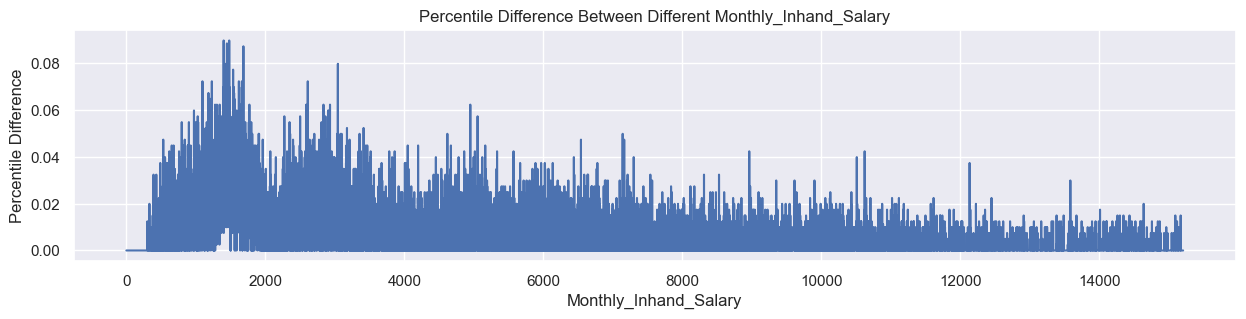

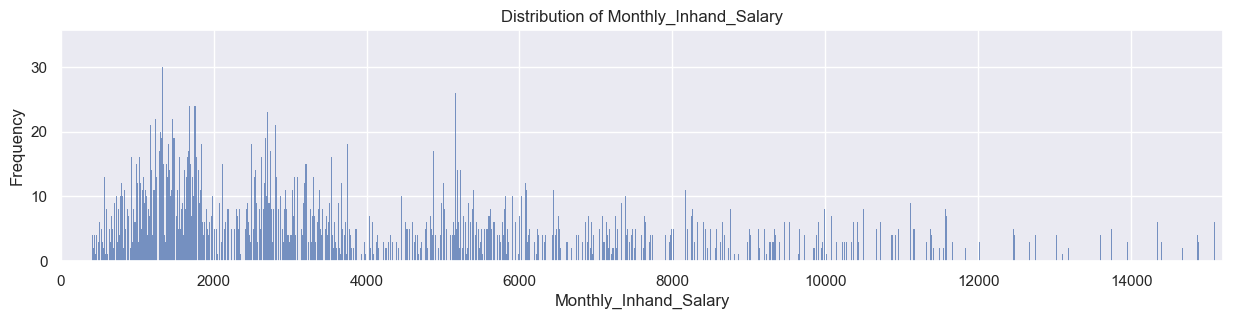

Number of outliers: 2

 Num_Bank_Accounts 

    Num_Bank_Accounts  Percentile  Percentile_Difference
0                   0      1.9541                    NaN
1                   1      5.9519                 3.9978
2                   2      9.9410                 3.9891
3                   3     17.5019                 7.5610
4                   4     29.0308                11.5289
5                   5     40.7515                11.7207
6                   6     53.4872                12.7357
7                   7     67.0287                13.5415
8                   8     80.2115                13.1828
9                   9     89.7564                 9.5449
10                 10     95.7108                 5.9544
11                 11     98.6774                 2.9666
12                 12     98.6799                 0.0025


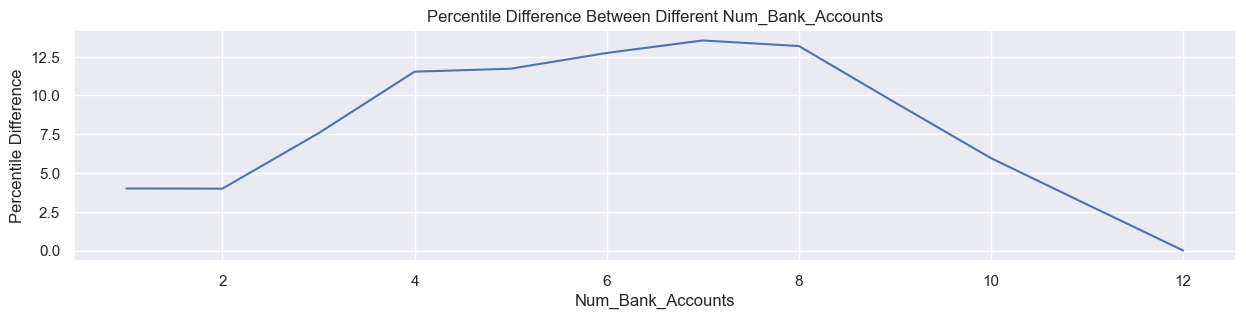

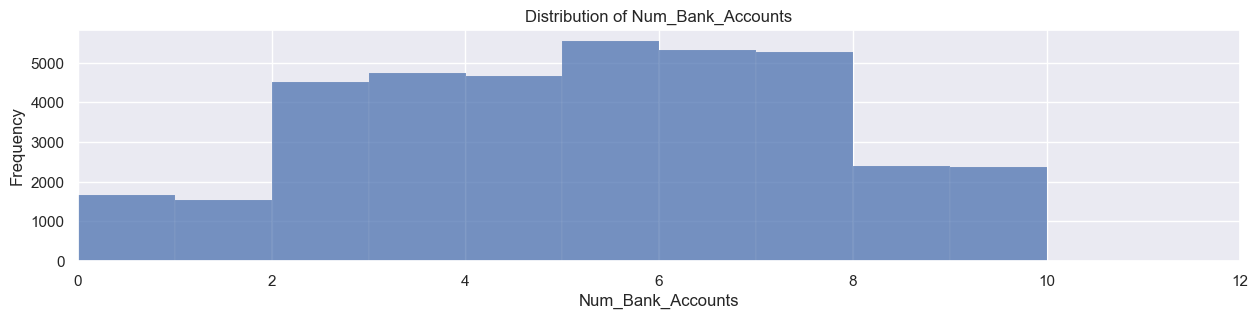

Number of outliers: 530

 Num_Credit_Card 

    Num_Credit_Card  Percentile  Percentile_Difference
0                 0      0.0037                    NaN
1                 1      0.9079                 0.9042
2                 2      2.7237                 1.8158
3                 3     10.1178                 7.3941
4                 4     23.2832                13.1654
5                 5     39.0378                15.7546
6                 6     56.4351                17.3973
7                 7     73.1138                16.6787
8                 8     84.2803                11.1665
9                 9     89.6717                 5.3914
10               10     94.9199                 5.2482
11               11     97.6088                 2.6889
12               12     97.6237                 0.0149


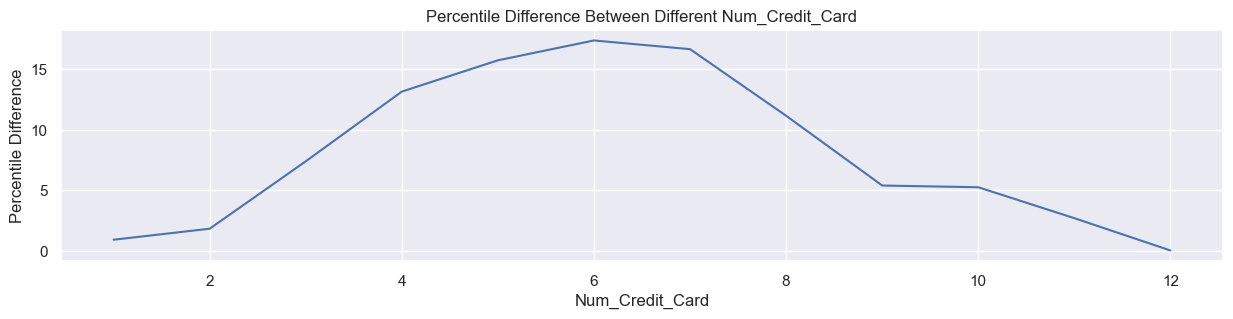

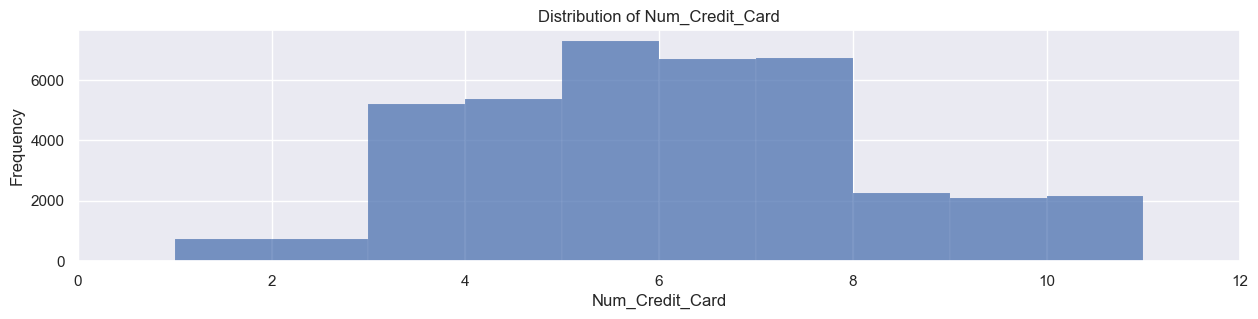

Number of outliers: 954

 Interest_Rate 

    Interest_Rate  Percentile  Percentile_Difference
0               0      0.0000                    NaN
1               1      1.1894                 1.1894
2               2      3.5183                 2.3289
3               3      5.9394                 2.4211
4               4      8.3643                 2.4248
5               5     11.8141                 3.4498
6               6     16.3150                 4.5010
7               7     20.5159                 4.2008
8               8     24.7453                 4.2295
9               9     29.1255                 4.3802
10             10     33.4496                 4.3241
11             11     37.5918                 4.1423
12             12     41.7765                 4.1846
13             13     45.1815                 3.4050
14             14     47.5316                 2.3501
15             15     50.7348                 3.2032
16             16     54.7189                 3.9841
17  

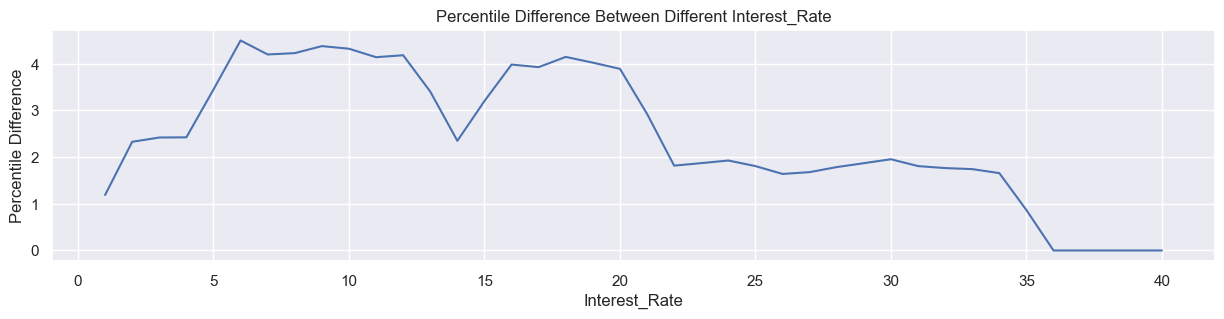

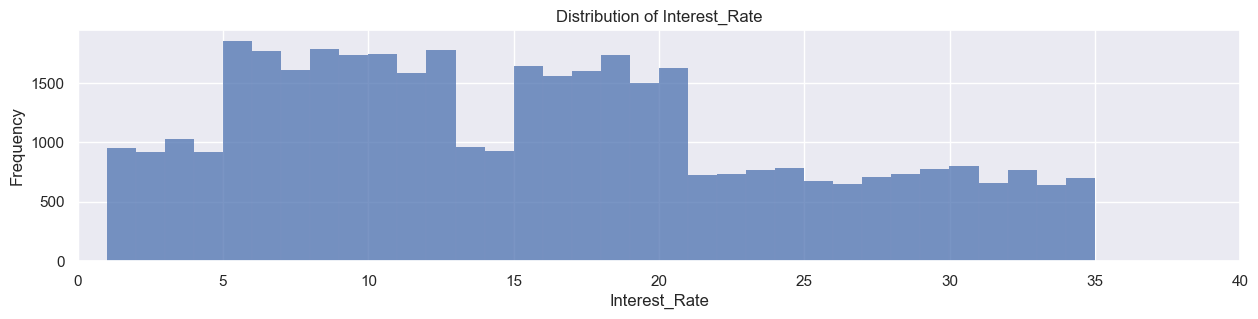

Number of outliers: 866

 Delay_from_due_date 

    Delay_from_due_date  Percentile  Percentile_Difference
0                     0      1.0574                    NaN
1                     1      2.1758                 1.1184
2                     2      3.3664                 1.1906
3                     3      4.7600                 1.3936
4                     4      6.3691                 1.6091
..                  ...         ...                    ...
61                   61     98.8318                 0.5903
62                   62     99.4184                 0.5866
63                   63     99.7671                 0.3487
64                   64     99.8418                 0.0747
65                   65     99.9053                 0.0635

[66 rows x 3 columns]


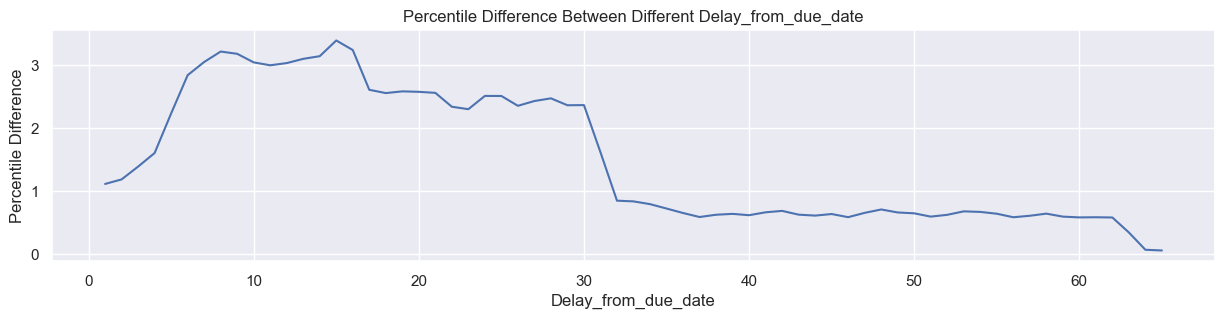

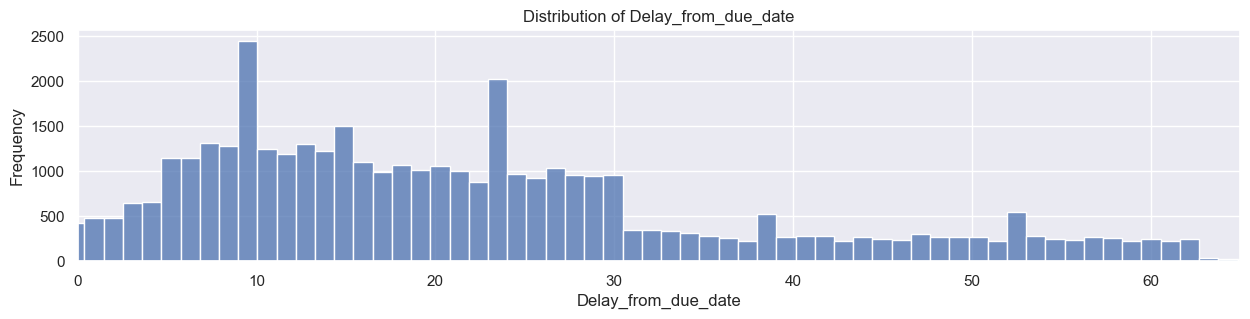

Number of outliers: 51

 Num_Credit_Inquiries 

    Num_Credit_Inquiries  Percentile  Percentile_Difference
0                      0      3.2655                    NaN
1                      1     10.0356                 6.7701
2                      2     17.2254                 7.1898
3                      3     25.0218                 7.7963
4                      4     34.5443                 9.5225
5                      5     42.7205                 8.1762
6                      6     49.8045                 7.0840
7                      7     58.4041                 8.5996
8                      8     66.9751                 8.5710
9                      9     74.1774                 7.2023
10                    10     79.8877                 5.7103
11                    11     85.5518                 5.6642
12                    12     90.9831                 5.4313
13                    13     94.4317                 3.4486
14                    14     95.9250                

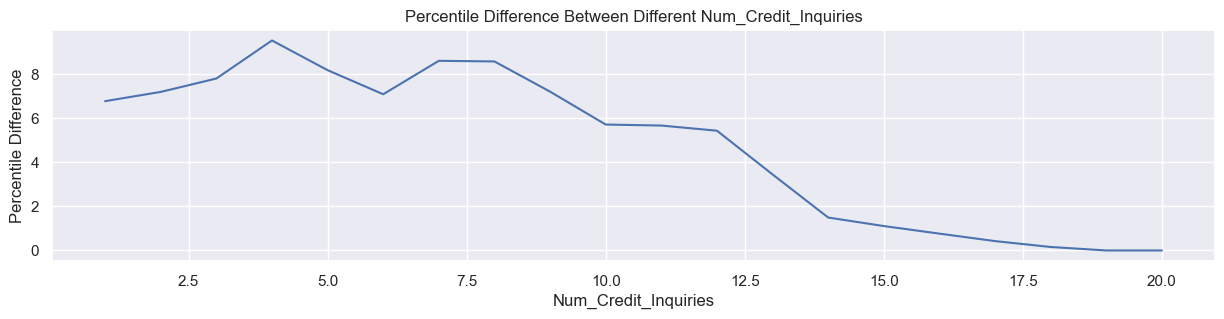

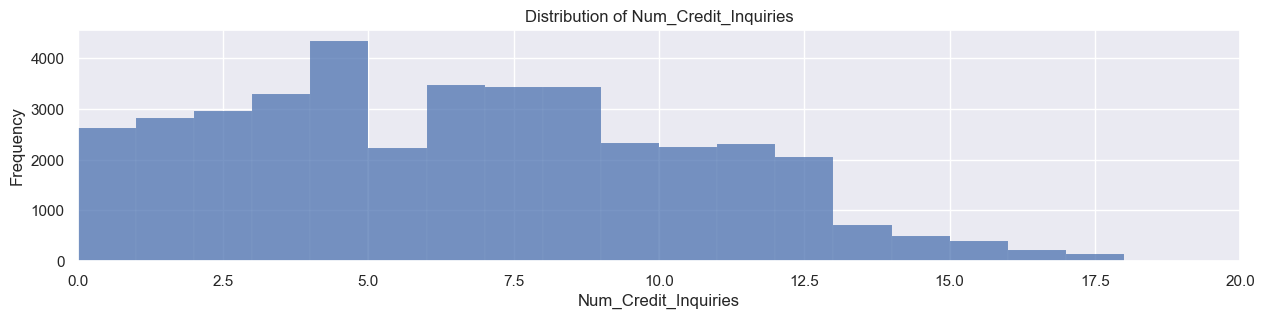

Number of outliers: 651

 Credit_Utilization_Ratio 

    Credit_Utilization_Ratio  Percentile  Percentile_Difference
0                          0      0.0000                    NaN
1                          1      0.0000                 0.0000
2                          2      0.0000                 0.0000
3                          3      0.0000                 0.0000
4                          4      0.0000                 0.0000
5                          5      0.0000                 0.0000
6                          6      0.0000                 0.0000
7                          7      0.0000                 0.0000
8                          8      0.0000                 0.0000
9                          9      0.0000                 0.0000
10                        10      0.0000                 0.0000
11                        11      0.0000                 0.0000
12                        12      0.0000                 0.0000
13                        13      0.0000           

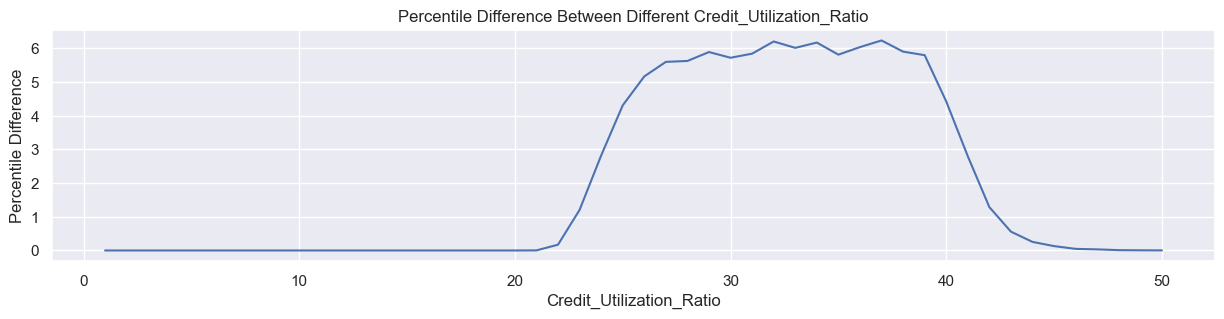

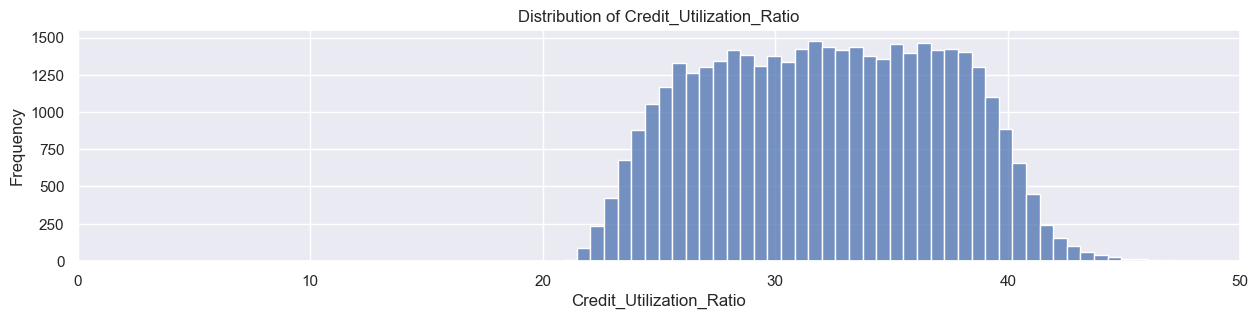

Number of outliers: 1

 Total_EMI_per_month 

     Total_EMI_per_month  Percentile  Percentile_Difference
0                      0      0.0000                    NaN
1                      1      0.0000                 0.0000
2                      2      0.0000                 0.0000
3                      3      0.0000                 0.0000
4                      4      0.0000                 0.0000
..                   ...         ...                    ...
596                  596     96.0146                 0.0025
597                  597     96.0171                 0.0025
598                  598     96.0171                 0.0000
599                  599     96.0171                 0.0000
600                  600     96.0171                 0.0000

[601 rows x 3 columns]


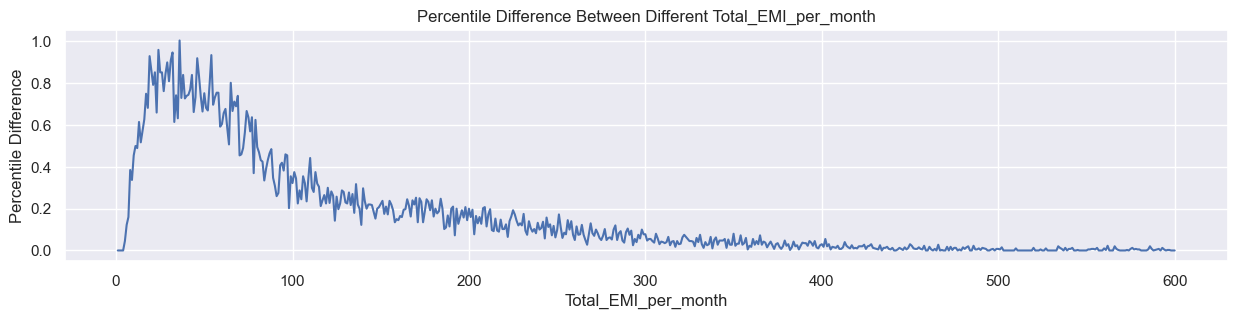

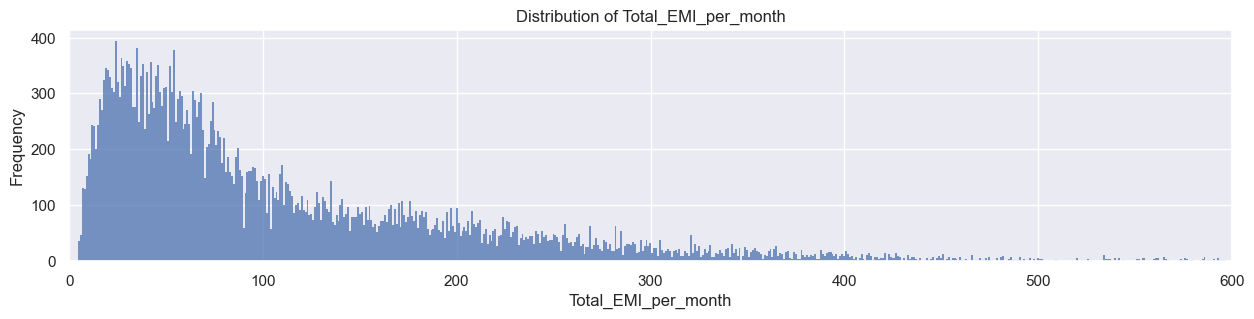

Number of outliers: 1599

 Num_of_Delayed_Payment 

    Num_of_Delayed_Payment  Percentile  Percentile_Difference
0                        0      1.4248                    NaN
1                        1      3.0351                 1.6103
2                        2      4.6517                 1.6166
3                        3      6.4525                 1.8009
4                        4      8.3032                 1.8507
5                        5     10.2100                 1.9067
6                        6     12.3085                 2.0985
7                        7     14.5777                 2.2692
8                        8     18.3264                 3.7487
9                        9     23.4227                 5.0963
10                      10     28.7282                 5.3055
11                      11     33.9602                 5.2320
12                      12     39.0228                 5.0626
13                      13     43.7866                 4.7637
14                

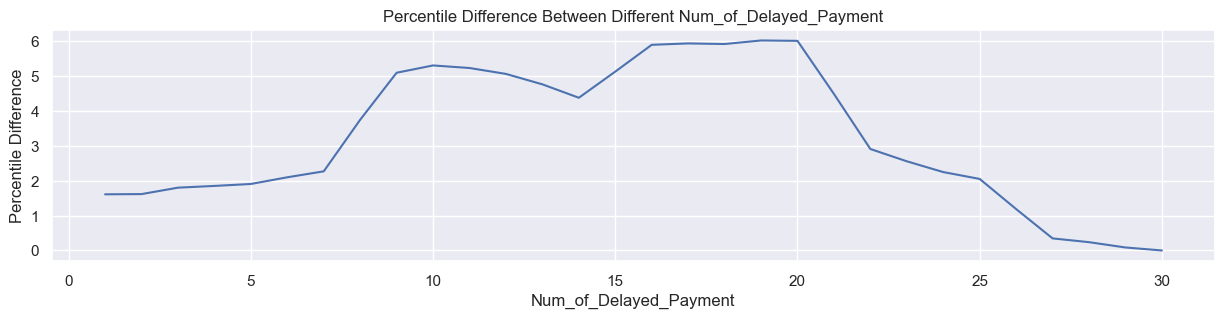

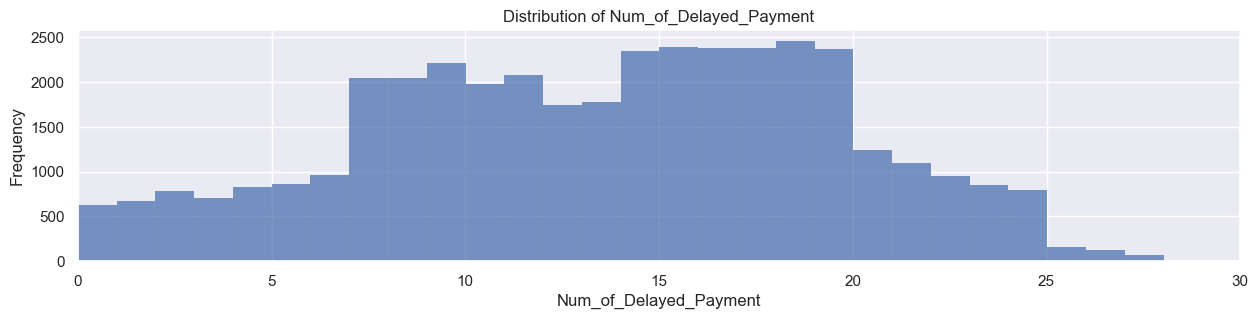

Number of outliers: 325

 Num_of_Loan 

    Num_of_Loan  Percentile  Percentile_Difference
0             0      4.1149                    NaN
1             1     10.1564                 6.0415
2             2     24.6158                14.4594
3             3     41.6096                16.9938
4             4     58.4913                16.8817
5             5     70.9468                12.4555
6             6     79.4206                 8.4739
7             7     87.7824                 8.3618
8             8     93.6147                 5.8323
9             9     97.4730                 3.8583
10           10     99.5342                 2.0612
11           11     99.5342                 0.0000
12           12     99.5342                 0.0000
13           13     99.5342                 0.0000
14           14     99.5342                 0.0000
15           15     99.5342                 0.0000
16           16     99.5342                 0.0000


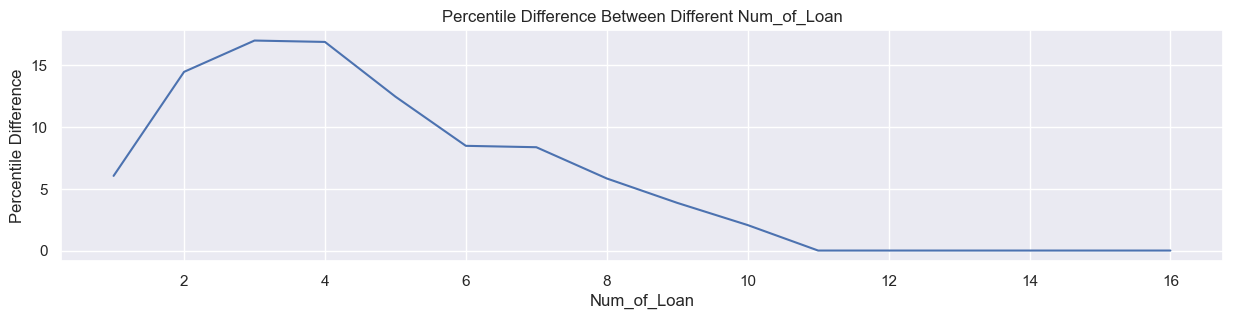

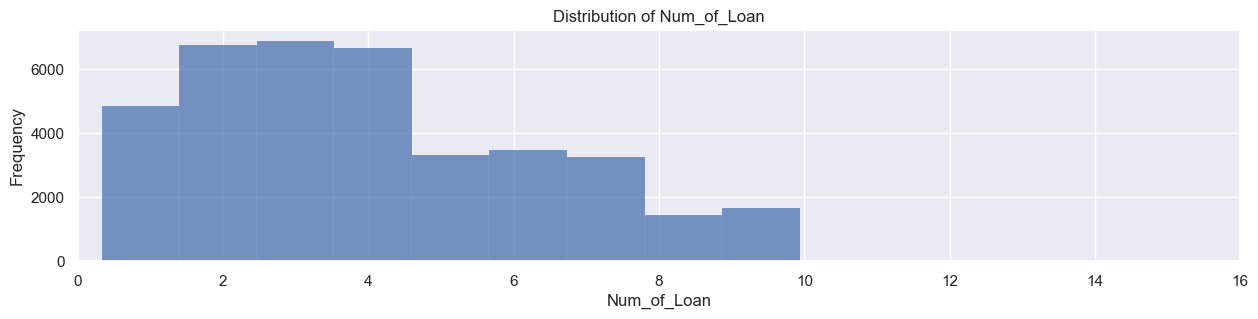

Number of outliers: 187


In [6]:
# Function Definition

def outlier_threshold(df, col_name, max_range):

    print("\n", col_name, "\n")

    # Calculate value at the specified percentile
    # max_range = df[col_name].quantile(max_percentile)

    # Generate the range of credit card numbers from 0 to the max_range
    num_cards = range(0, int(max_range) + 1)
    percentiles = {card: percentileofscore(df[col_name], card, kind='rank') for card in num_cards}

    max_percentile = percentileofscore(df[col_name], max_range, kind='rank')
    max_percentile /= 100

    # Convert dictionary to DataFrame
    percentile_df = pd.DataFrame(list(percentiles.items()), columns=[col_name, 'Percentile'])
    percentile_df['Percentile_Difference'] = percentile_df['Percentile'].diff()

    # Print the DataFrame of percentiles and differences
    print(percentile_df)

    # Plotting the percentile differences
    plt.figure(figsize = (15, 3))
    plt.plot(percentile_df[col_name], percentile_df["Percentile_Difference"])
    plt.title('Percentile Difference Between Different ' + col_name)
    plt.xlabel(col_name)
    plt.ylabel('Percentile Difference')
    plt.show()

    # Plotting the distribution of the number of credit cards
    plt.figure(figsize=(15, 3))
    sns.histplot(df[col_name], kde=False, bins=int(df[col_name].max()))
    plt.xlim(0, max_range)
    plt.title('Distribution of ' + col_name)
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.show()

    # Counting outliers above a certain threshold
    threshold = df[col_name].quantile(max_percentile)
    print("Number of outliers:", len(df[df[col_name] >= threshold]))


# Drop all rows with NaN values for initial analysis
df_train_unique_clean = df_train_unique.dropna()
df_test_unique_clean = df_test_unique.dropna()

#Function calls
outlier_threshold(df_train_unique_clean, 'Monthly_Inhand_Salary', 15204.6333)
outlier_threshold(df_train_unique_clean, 'Num_Bank_Accounts', 12)
outlier_threshold(df_train_unique_clean, 'Num_Credit_Card', 12)
outlier_threshold(df_train_unique_clean, 'Interest_Rate', 40)
outlier_threshold(df_train_unique_clean, 'Delay_from_due_date', 65)
outlier_threshold(df_train_unique_clean, 'Num_Credit_Inquiries', 20)
outlier_threshold(df_train_unique_clean, 'Credit_Utilization_Ratio', 50)
outlier_threshold(df_train_unique_clean, 'Total_EMI_per_month', 600)
outlier_threshold(df_train_unique_clean, 'Num_of_Delayed_Payment', 30)
outlier_threshold(df_train_unique_clean, 'Num_of_Loan', 16)

In [7]:
def percent_between_values(df, col_name, lower_bound, upper_bound):

    # Count the total number of data points within the specified range
    count_in_range = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)].shape[0]

    # Calculate the total number of data points in the column
    total_count = df.shape[0]

    # Calculate the percentage of data within the range
    percent = (count_in_range / total_count) * 100

    print("The percentage of data remaining after outlier removal of", col_name, "is:", percent)

    return

percent_between_values(df_train_unique_clean, 'Monthly_Inhand_Salary', 0, 15204.63)
percent_between_values(df_train_unique_clean, 'Num_Bank_Accounts', 0, 12)
percent_between_values(df_train_unique_clean, 'Num_Credit_Card', 0, 12)
percent_between_values(df_train_unique_clean, 'Interest_Rate', 0, 35)
percent_between_values(df_train_unique_clean, 'Delay_from_due_date', 0, 65)
percent_between_values(df_train_unique_clean, 'Num_Credit_Inquiries', 0, 18)
percent_between_values(df_train_unique_clean, 'Credit_Utilization_Ratio', 22, 48)
percent_between_values(df_train_unique_clean, 'Total_EMI_per_month', 0, 500)
percent_between_values(df_train_unique_clean, 'Num_of_Delayed_Payment',0,30)
percent_between_values(df_train_unique_clean, 'Num_of_Loan',0,16)

The percentage of data remaining after outlier removal of Monthly_Inhand_Salary is: 99.99501830771914
The percentage of data remaining after outlier removal of Num_Bank_Accounts is: 98.66490646872744
The percentage of data remaining after outlier removal of Num_Credit_Card is: 97.62373278202605
The percentage of data remaining after outlier removal of Interest_Rate is: 97.84292724238423
The percentage of data remaining after outlier removal of Delay_from_due_date is: 99.40468777243629
The percentage of data remaining after outlier removal of Num_Credit_Inquiries is: 98.37845916257753
The percentage of data remaining after outlier removal of Credit_Utilization_Ratio is: 99.81816823174833
The percentage of data remaining after outlier removal of Total_EMI_per_month is: 95.65596433108327
The percentage of data remaining after outlier removal of Num_of_Delayed_Payment is: 98.59267193065484
The percentage of data remaining after outlier removal of Num_of_Loan is: 95.41933394774205


Therefore, we can conclude the following regarding the outliers of each columns:

---

#### **1. Monthly_Inhand_Salary**

- Min Cutoff Threshold: N/A
- Max Cutoff Threshold: N/A
- Percentage Covered: 99.99622990065788

**Explanation:** The Monthly_Inhand_Salary is evenly distributed across the entire range of the dataset.

---

#### **2. Num_Bank_Accounts**

- Min Cutoff Threshold: 0
- Max Cutoff Threshold: 12
- Percentage Covered: 98.7219363230221

**Explanation:**  

---

#### **3. Num_Credit_Card**

- Min Cutoff Threshold: 0
- Max Cutoff Threshold: 12
- Percentage Covered: 97.70023940130822

**Explanation:**

---

#### **4. Interest_Rate**

- Min Cutoff Threshold: 0
- Max Cutoff Threshold: 35
- Percentage Covered: 97.85858357367717

**Explanation:**

---

#### **5. Delay_from_due_date**

- Min Cutoff Threshold: 0
- Max Cutoff Threshold: 65
- Percentage Covered: 99.42694489999812

**Explanation:**

---

#### **6. Num_Credit_Inquiries**

- Min Cutoff Threshold: 0
- Max Cutoff Threshold: 18
- Percentage Covered: 98.37131708420517

**Explanation:**  

---

#### **7. Credit_Utilization_Ratio**

- Min Cutoff Threshold: 22
- Max Cutoff Threshold: 48
- Percentage Covered: 99.82092028124941

**Explanation:**  

---

#### **8. Total_EMI_per_month**

- Min Cutoff Threshold: 0
- Max Cutoff Threshold: 500
- Percentage Covered: 95.6549605082094

**Explanation:**  

---

#### **9. Num_of_Delayed_Payment**

- Min Cutoff Threshold: 0
- Max Cutoff Threshold: 30
- Percentage Covered: 99.20245132127955

**Explanation:**  

---

#### **10. Num_of_Delayed_Payment**

- Min Cutoff Threshold: 0
- Max Cutoff Threshold: 16
- Percentage Covered: 99.4980006954103

**Explanation:**  

In [8]:
def clear_non_numeric_values(df, column_name):
    """
    Cleans a column in the dataframe by converting non-numeric values to NaN
    """
    # identify non-numeric characters
    non_numeric_pattern = r'[^\d.]+'
    
    # replace non-numeric characters with NaN
    df[column_name] = df[column_name].replace(non_numeric_pattern, np.nan, regex=True)
    
    return df

In [9]:
#clear the non_numeric values of the numeric columns
df_train_unique=clear_non_numeric_values(df_train_unique, 'Age')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Annual_Income')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Outstanding_Debt')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Amount_invested_monthly')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Monthly_Balance')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Changed_Credit_Limit')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Monthly_Balance')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Num_of_Loan')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Num_of_Delayed_Payment')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Num_Credit_Inquiries')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Num_Bank_Accounts')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Delay_from_due_date')
df_train_unique=clear_non_numeric_values(df_train_unique, 'Num_of_Delayed_Payment')
df_train_unique

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.8433,3,...,_,809.98,26.8226,22 Years and 1 Months,No,49.5749,80.4153,High_spent_Small_value_payments,312.4941,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.9450,NaN,No,49.5749,118.2802,Low_spent_Large_value_payments,284.6292,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.6094,22 Years and 3 Months,No,49.5749,81.6995,Low_spent_Medium_value_payments,331.2099,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.3779,22 Years and 4 Months,No,49.5749,199.4581,Low_spent_Small_value_payments,223.4513,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.8433,3,...,Good,809.98,24.7973,22 Years and 5 Months,No,49.5749,41.4202,High_spent_Medium_value_payments,341.4892,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.4158,4,...,_,502.38,34.6636,31 Years and 6 Months,No,35.1040,60.9713,High_spent_Large_value_payments,479.8662,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.4158,4,...,_,502.38,40.5656,31 Years and 7 Months,No,35.1040,54.1860,High_spent_Medium_value_payments,496.6516,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.4158,4,...,Good,502.38,41.2555,31 Years and 8 Months,No,35.1040,24.0285,High_spent_Large_value_payments,516.8091,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.4158,4,...,Good,502.38,33.6382,31 Years and 9 Months,No,35.1040,251.6726,Low_spent_Large_value_payments,319.1650,Standard


In [10]:
df=df_train_unique
#Age
df.drop(df[df['Age'] < 0].index, inplace=True)
df.drop(df[df['Age'] >100].index, inplace=True)
# Annual_Income             
# Monthly_Inhand_Salary     
# Num_Bank_Accounts         
df.drop(df[df['Num_Bank_Accounts'] < 0].index, inplace=True)
df.drop(df[df['Num_Bank_Accounts'] > 12].index, inplace=True)
# Num_Credit_Card          
df.drop(df[df['Num_Credit_Card'] < 0].index, inplace=True)
df.drop(df[df['Num_Credit_Card'] > 12].index, inplace=True)
# Interest_Rate             
df.drop(df[df['Interest_Rate'] > 35].index, inplace=True)
# Num_of_Loan            
df.drop(df[df['Num_of_Loan'] < 0].index, inplace=True)
df.drop(df[df['Num_of_Loan'] > 16].index, inplace=True)
# Type_of_Loan             
# Delay_from_due_date       
df.drop(df[df['Delay_from_due_date'] < 0].index, inplace=True)
# Num_of_Delayed_Payment   
df.drop(df[df['Num_of_Delayed_Payment'] < 0].index, inplace=True)
df.drop(df[df['Num_of_Delayed_Payment'] > 30].index, inplace=True)
df['Num_of_Delayed_Payment'].fillna(method='ffill', inplace=True)
# Changed_Credit_Limit    
# Num_Credit_Inquiries  
df.drop(df[df['Num_Credit_Inquiries'] < 0].index, inplace=True)
df.drop(df[df['Num_Credit_Inquiries'] > 18].index, inplace=True)
df['Num_Credit_Inquiries'].fillna(method='ffill', inplace=True)
# Credit_Mix              
df['Credit_Mix'].fillna('Unknown', inplace=True)
df['Credit_Mix'].astype('object')
# Outstanding_Debt          
# Credit_Utilization_Ratio  
# Payment_of_Min_Amount   
# Total_EMI_per_month    
df.drop(df[df['Total_EMI_per_month'] > 500].index, inplace=True)
# Amount_invested_monthly  
df['Amount_invested_monthly'].fillna(method='ffill', inplace=True)
# Monthly_Balance 
df.drop(df[df['Monthly_Balance'] < 0].index, inplace = True)
df['Monthly_Balance'].fillna(method='ffill', inplace=True)
# Credit_Score
# Payment_Behaviour       
df['Payment_Behaviour'].replace('!@9#%8', pd.NA, inplace=True)
df['Payment_Behaviour'].fillna(df['Payment_Behaviour'].mode()[0], inplace=True)

In [11]:
# Credit_History_Age   
import re
#change the format of credit_history_age
def convert_age_to_years(age_str):
    if pd.isna(age_str):
        return None
    # Extract years and months
    pattern = r'(\d+)\s+Years\s+and\s+(\d+)\s+Months'
    match = re.match(pattern, age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        return years + months / 12
    else:
        return None
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_age_to_years)
df['Credit_History_Age'].fillna(method='ffill', inplace=True)
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.8433,3,...,_,809.98,26.8226,22.0833,No,49.5749,80.4153,High_spent_Small_value_payments,312.4941,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.3779,22.3333,No,49.5749,199.4581,Low_spent_Small_value_payments,223.4513,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.8433,3,...,Good,809.98,24.7973,22.4167,No,49.5749,41.4202,High_spent_Medium_value_payments,341.4892,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.2623,22.5000,No,49.5749,62.4302,Low_spent_Small_value_payments,340.4792,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.8433,3,...,Good,809.98,22.5376,22.5833,No,49.5749,178.3441,Low_spent_Small_value_payments,244.5653,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0x25fe8,CUS_0x942c,March,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.4158,4,...,_,502.38,39.3236,31.4167,No,35.1040,140.5814,High_spent_Medium_value_payments,410.2562,Poor
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.4158,4,...,_,502.38,34.6636,31.5000,No,35.1040,60.9713,High_spent_Large_value_payments,479.8662,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.4158,4,...,_,502.38,40.5656,31.5833,No,35.1040,54.1860,High_spent_Medium_value_payments,496.6516,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.4158,4,...,Good,502.38,33.6382,31.7500,No,35.1040,251.6726,Low_spent_Large_value_payments,319.1650,Standard


In [12]:
df_train_final=df.dropna()

In [13]:
df_train_final

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.8433,3,...,_,809.98,26.8226,22.0833,No,49.5749,80.4153,High_spent_Small_value_payments,312.4941,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.8433,3,...,Good,809.98,24.7973,22.4167,No,49.5749,41.4202,High_spent_Medium_value_payments,341.4892,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.8433,3,...,Good,809.98,22.5376,22.5833,No,49.5749,178.3441,Low_spent_Small_value_payments,244.5653,Good
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.9867,2,...,Good,605.03,38.5508,26.6667,No,18.8162,40.3912,High_spent_Large_value_payments,484.5912,Good
12,0x1612,CUS_0x21b1,May,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.9867,2,...,Good,605.03,34.9779,26.9167,No,18.8162,130.1154,Low_spent_Small_value_payments,444.8670,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,0x25fe6,CUS_0x942c,January,Nicks,24.0,078-73-5990,Mechanic,39628.99,3359.4158,4,...,_,502.38,32.9913,31.2500,No,35.1040,401.1965,Low_spent_Small_value_payments,189.6411,Poor
99994,0x25fe8,CUS_0x942c,March,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.4158,4,...,_,502.38,39.3236,31.4167,No,35.1040,140.5814,High_spent_Medium_value_payments,410.2562,Poor
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.4158,4,...,_,502.38,34.6636,31.5000,No,35.1040,60.9713,High_spent_Large_value_payments,479.8662,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.4158,4,...,_,502.38,40.5656,31.5833,No,35.1040,54.1860,High_spent_Medium_value_payments,496.6516,Poor


In [14]:
df_train_final.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,44681.0000,4.4681e+04,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000
mean,32.8546,1.7716e+05,3996.5620,5.5762,5.6755,15.3511,4.0071,22.3009,13.8652,10.7977,6.1404,1524.4134,32.1572,17.6738,109.5443,188.2025,380.4220
std,10.6227,1.4522e+06,3066.5046,2.5571,2.0818,8.8582,2.2245,15.2076,6.1728,6.9340,3.9048,1196.6700,5.0647,8.3340,94.3603,192.7834,193.8858
min,14.0000,7.0059e+03,303.6454,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,-6.4500,0.0000,0.2300,20.0000,0.1667,4.4628,0.0000,0.0078
25%,24.0000,1.8755e+04,1567.7867,4.0000,4.0000,8.0000,2.0000,11.0000,9.0000,5.6600,3.0000,614.6000,27.9693,11.0833,40.1775,69.8446,264.4731
50%,32.0000,3.5854e+04,2975.7250,6.0000,6.0000,15.0000,4.0000,19.0000,14.0000,9.7300,6.0000,1255.5700,32.1649,17.5000,75.0023,124.1070,324.0091
75%,41.0000,6.9342e+04,5685.0567,8.0000,7.0000,21.0000,6.0000,29.0000,19.0000,15.5200,9.0000,2164.8400,36.3697,24.2500,155.9091,226.9512,441.2153
max,95.0000,2.4198e+07,15204.6333,11.0000,11.0000,34.0000,9.0000,67.0000,28.0000,36.4900,17.0000,4998.0700,49.5645,33.6667,499.9292,1977.3261,1552.9461


#### clean the test data with the same procedure

In [15]:
#convert below columns to numerical columns
df_test_unique['Age'] = pd.to_numeric(df_test_unique['Age'], errors='coerce')
df_test_unique['Annual_Income'] = pd.to_numeric(df_test_unique['Annual_Income'], errors='coerce')
df_test_unique['Outstanding_Debt'] = pd.to_numeric(df_test_unique['Outstanding_Debt'], errors='coerce')
df_test_unique['Amount_invested_monthly'] = pd.to_numeric(df_test_unique['Amount_invested_monthly'], errors='coerce')
df_test_unique['Monthly_Balance'] = pd.to_numeric(df_test_unique['Monthly_Balance'], errors='coerce')
df_test_unique['Changed_Credit_Limit'] = pd.to_numeric(df_test_unique['Changed_Credit_Limit'], errors='coerce')
df_test_unique['Monthly_Balance'] = pd.to_numeric(df_test_unique['Monthly_Balance'], errors='coerce')
df_test_unique['Num_of_Loan'] = pd.to_numeric(df_test_unique['Num_of_Loan'], errors='coerce')
df_test_unique['Num_of_Delayed_Payment'] = pd.to_numeric(df_test_unique['Num_of_Delayed_Payment'], errors='coerce')

#clear the non_numeric values of the numeric columns
df_test_unique=clear_non_numeric_values(df_test_unique, 'Age')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Annual_Income')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Outstanding_Debt')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Amount_invested_monthly')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Monthly_Balance')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Changed_Credit_Limit')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Monthly_Balance')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Num_of_Loan')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Num_of_Delayed_Payment')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Num_Credit_Inquiries')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Num_Bank_Accounts')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Delay_from_due_date')
df_test_unique=clear_non_numeric_values(df_test_unique, 'Num_of_Delayed_Payment')

df=df_test_unique

#Age
df.drop(df[df['Age'] < 0].index, inplace=True)
df.drop(df[df['Age'] >100].index, inplace=True)
# Annual_Income             
# Monthly_Inhand_Salary     
# Num_Bank_Accounts         
df.drop(df[df['Num_Bank_Accounts'] < 0].index, inplace=True)
df.drop(df[df['Num_Bank_Accounts'] > 12].index, inplace=True)
# Num_Credit_Card          
df.drop(df[df['Num_Credit_Card'] < 0].index, inplace=True)
df.drop(df[df['Num_Credit_Card'] > 12].index, inplace=True)
# Interest_Rate             
df.drop(df[df['Interest_Rate'] > 35].index, inplace=True)
# Num_of_Loan            
df.drop(df[df['Num_of_Loan'] < 0].index, inplace=True)
df.drop(df[df['Num_of_Loan'] > 16].index, inplace=True)
# Type_of_Loan             
# Delay_from_due_date       
df.drop(df[df['Delay_from_due_date'] < 0].index, inplace=True)
# Num_of_Delayed_Payment   
df.drop(df[df['Num_of_Delayed_Payment'] < 0].index, inplace=True)
df.drop(df[df['Num_of_Delayed_Payment'] > 30].index, inplace=True)
df['Num_of_Delayed_Payment'].fillna(method='ffill', inplace=True)
# Changed_Credit_Limit    
# Num_Credit_Inquiries  
df.drop(df[df['Num_Credit_Inquiries'] < 0].index, inplace=True)
df.drop(df[df['Num_Credit_Inquiries'] > 18].index, inplace=True)
df['Num_Credit_Inquiries'].fillna(method='ffill', inplace=True)
# Credit_Mix              
df['Credit_Mix'].fillna('Unknown', inplace=True)
df['Credit_Mix'].astype('object')
# Outstanding_Debt          
# Credit_Utilization_Ratio  
# Payment_of_Min_Amount   
# Total_EMI_per_month    
df.drop(df[df['Total_EMI_per_month'] > 500].index, inplace=True)
# Amount_invested_monthly  
df['Amount_invested_monthly'].fillna(method='ffill', inplace=True)
# Monthly_Balance 
df.drop(df[df['Monthly_Balance'] < 0].index, inplace = True)
df['Monthly_Balance'].fillna(method='ffill', inplace=True)
# Credit_Score
# Payment_Behaviour       
df['Payment_Behaviour'].replace('!@9#%8', pd.NA, inplace=True)
df['Payment_Behaviour'].fillna(df['Payment_Behaviour'].mode()[0], inplace=True)
#Credit History Age
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_age_to_years)
df['Credit_History_Age'].fillna(method='ffill', inplace=True)

df_test_final=df.dropna()
df_test_final.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,21938.000,2.1938e+04,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000
mean,33.376,1.5839e+05,3936.8754,5.5636,5.6742,15.3515,3.9973,22.3138,13.8447,10.7380,7.6749,1533.9416,32.1243,18.1718,113.7971,185.1059,378.4843
std,10.605,1.3156e+06,3040.6639,2.5767,2.0970,8.8810,2.2285,15.2552,6.1866,6.9611,3.9881,1193.9589,5.0464,8.3338,98.0876,187.3826,191.7136
min,14.000,7.0059e+03,303.6454,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,-6.4500,0.0000,0.2300,20.5097,0.8333,4.4628,0.0000,0.1034
25%,25.000,1.8668e+04,1548.3483,4.0000,4.0000,8.0000,2.0000,11.0000,9.0000,5.5900,5.0000,628.1100,27.9341,11.5833,41.3204,70.0223,263.9701
50%,33.000,3.5609e+04,2944.6133,6.0000,6.0000,15.0000,4.0000,19.0000,14.0000,9.6800,7.0000,1264.6100,32.1695,18.0000,78.2712,123.5700,322.7969
75%,42.000,6.7686e+04,5532.5033,8.0000,7.0000,21.0000,6.0000,29.0000,19.0000,15.4700,11.0000,2186.2000,36.2740,24.6667,164.0646,222.2886,438.6903
max,56.000,2.4017e+07,15204.6333,11.0000,11.0000,34.0000,9.0000,67.0000,28.0000,36.6500,17.0000,4997.1000,48.0965,34.0000,499.9292,1801.3582,1496.4089


### Exporting cleaned data files

In [16]:
df_train_final.to_csv('train_cleaned.csv', index=False)
df_test_final.to_csv('test_cleaned.csv', index=False)

### Dataset #1: Credit Approval by UC Irvine

URL: https://archive.ics.uci.edu/dataset/27/credit+approval <br>
Number of Columns: 15<br>
Number of Rows:    690<br>
Missing Headings?  YES<br>
Mising Values?     YES<br>
Pseudodata?        NO<br>

**Commment:** <br>
Excluded from the analysis as the headers are missing.


In [17]:
def outlier_threshold (col_name, max_percentile):
  max_range = df_train_unique['Num_Credit_Card'].quantile([max_percentile])

  num_cards = range(0, max_range)
  percentiles = {card: percentileofscore(df_train_unique['Num_Credit_Card'], card, kind='rank') for card in num_cards}

  # Convert dictionary to dataframe
  percentile_df = pd.DataFrame(list(percentiles.items()), columns=['Num_Credit_Card', 'Percentile'])
  percentile_df['Percentile_Difference'] = percentile_df['Percentile'].diff()

  print(percentile_df)

  plt.figure(figsize = (10, 6))
  plt.plot(percentile_df["Num_Credit_Card"], percentile_df["Percentile_Difference"])
  plt.xlim(0, max_range)
  plt.title('Percentile Difference Between Different Number of Credit Cards')
  plt.xlabel('Num_Credit_Card')
  plt.ylabel('Percentile')
  plt.show()

  plt.figure(figsize=(10, 6))
  sns.histplot(df_train_unique['Num_Credit_Card'], kde=False, bins=int(df_train_unique['Num_Credit_Card'].max()))
  plt.xlim(0, max_range)
  plt.title('Distribution of Num_Credit_Card')
  plt.xlabel('Num_Credit_Card')
  plt.ylabel('Frequency')
  plt.show()

  print("Number of outliers:", len(df_train_unique[df_train_unique['Num_Credit_Card'] >= 11]))

np.unique(df_train_unique["Credit_Mix"])

array(['Bad', 'Good', 'Standard', '_'], dtype=object)